# Python Programming PyTorch

### Tensor experiments

In [1]:
import torch

In [2]:
# tensor is an array
x = torch.tensor([5, 3])
y = torch.tensor([2, 1])

x * y

tensor([10,  3])

In [4]:
x = torch.zeros([2, 5])
x

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [5]:
x.shape

torch.Size([2, 5])

In [6]:
y = torch.rand([2,5])
y

tensor([[0.5059, 0.5770, 0.6292, 0.8171, 0.3699],
        [0.8121, 0.8702, 0.8264, 0.5786, 0.4227]])

In [7]:
# reshape using view
y.view([1,10])

tensor([[0.5059, 0.5770, 0.6292, 0.8171, 0.3699, 0.8121, 0.8702, 0.8264, 0.5786,
         0.4227]])

### Data

In [8]:
import torch
import torchvision
from torchvision import transforms, datasets

In [9]:
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

100.1%

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


113.5%

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


100.4%

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


180.4%

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [10]:
# wan to shuffle so that the network is trained on random examples and can generalise
# rather than optimising for a single digit and then shifting to a new one
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [11]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [12]:
# data is a tensor of tensors that is images and labels
X, y = data[0][0], data[1][0]

y

tensor(9)

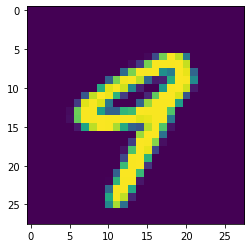

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.imshow(data[0][0].view(28,28))
plt.show()

In [16]:
data[0][0].shape

torch.Size([1, 28, 28])

In [17]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}


for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


### Training a nn

In [18]:
import torch.nn as nn
import torch.nn.functional as F

In [26]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # fully connected layer
        # input images 28 * 28 pixels = 784
        # Output: Want 3 layers of 64 neurons for our hidden layers
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        # output layer has 10 neurons as there are 10 digits to predict
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [24]:
# create network we can pass data to
X = torch.randn((28,28))
# reshape to flattened format to pass to model
X = X.view(1,28*28)
X

tensor([[ 1.2672e+00,  1.8190e+00,  1.5757e-02,  1.5817e-01, -6.0748e-01,
         -7.7819e-01, -8.3922e-01,  3.5173e-01, -1.7759e-01, -3.1493e-01,
          2.6827e+00, -4.1392e-01,  6.8466e-01, -6.9677e-01,  4.1130e-02,
          9.2468e-01,  2.4205e-01,  4.1756e-01, -4.3038e-02,  1.5876e-01,
          1.2321e-01, -4.9035e-01,  1.0733e+00, -8.9826e-01, -6.2254e-01,
         -1.9527e-01, -1.6225e-01, -6.3452e-01,  1.0043e+00,  3.0868e-01,
         -3.2317e-01,  1.7033e+00, -6.2835e-01, -1.5230e+00, -5.8405e-01,
         -7.1973e-01, -8.1309e-01, -9.2498e-01, -2.5899e-02,  2.9209e-01,
         -2.6866e-01,  2.8285e-01,  6.3147e-01,  6.0927e-02, -8.3773e-01,
         -2.2003e-02,  1.0126e-01, -1.8787e+00, -9.2426e-01,  1.0939e+00,
         -7.1501e-01,  1.0718e-01,  1.5318e-01,  1.2208e+00, -2.8104e-01,
         -8.8061e-04, -2.7097e+00, -1.1781e+00, -4.7836e-01,  1.7260e+00,
          1.8019e-01,  1.1163e+00,  1.6097e+00, -7.3025e-01, -3.5475e-01,
          2.2242e-01, -2.2525e+00,  1.

In [28]:
output = net(X)
#outut is a tensor containing a tensor of 10 possible classes
output

tensor([[-2.2439, -2.4105, -2.2710, -2.2672, -2.2666, -2.2665, -2.3831, -2.4219,
         -2.2724, -2.2448]], grad_fn=<LogSoftmaxBackward>)

### Training Neural Network
- Loss: error
- Optimiser adjusts weights to lower loss
- Learning rate can be decayed so it starts broad and becomes more narrow

In [ ]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [31]:
# each pass through your data is an epoch
for epoch in range(3): # 3 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines! 

tensor(0.1123, grad_fn=<NllLossBackward>)
tensor(0.0037, grad_fn=<NllLossBackward>)
tensor(0.0048, grad_fn=<NllLossBackward>)


In [32]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.968


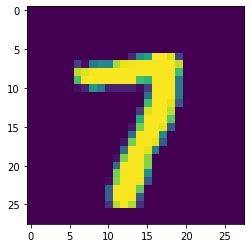

In [43]:
import matplotlib.pyplot as plt

image_num = 0

plt.imshow(X[image_num].view(28,28))
plt.show()

In [44]:
print(torch.argmax(net(X[image_num].view(-1,784))[0]))

tensor(7)


## Convolutional Neural Networks

In [46]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [47]:
REBUILD_DATA = True # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    pet_dir = '/Users/jacksimpson/Downloads/kagglecatsanddogs_3367a/PetImages'
    
    IMG_SIZE = 50
    CATS = pet_dir + "/Cat"
    DOGS = pet_dir + "/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

  1%|          | 98/12501 [00:00<00:12, 977.22it/s]

/Users/jacksimpson/Downloads/kagglecatsanddogs_3367a/PetImages/Cat


  1%|          | 99/12501 [00:00<00:12, 989.59it/s]

/Users/jacksimpson/Downloads/kagglecatsanddogs_3367a/PetImages/Dog


100%|██████████| 12501/12501 [00:12<00:00, 963.29it/s]


Cats: 12476
Dogs: 12470


In [48]:
training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))

24946


In [49]:
# split our training data into X and y, as well as convert it to a tensor
import torch

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

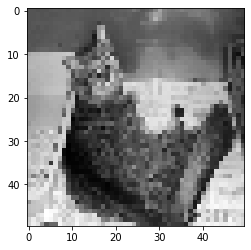

In [50]:
import matplotlib.pyplot as plt

plt.imshow(X[0], cmap="gray")

In [51]:
print(y[0])

tensor([1., 0.])


In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__() # just run the init of parent class (nn.Module)
        self.conv1 = nn.Conv2d(1, 32, 5) # input is 1 image, 32 output channels, 5x5 kernel / window
        self.conv2 = nn.Conv2d(32, 64, 5) # input is 32, bc the first layer output 32. Then we say the output will be 64 channels, 5x5 kernel / window
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512) #flattening.
        self.fc2 = nn.Linear(512, 2) # 512 in, 2 out bc we're doing 2 classes (dog vs cat).

    def convs(self, x):
        # max pooling over 2x2
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # .view is reshape ... this flattens X before 
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # bc this is our output layer. No activation here.
        return F.softmax(x, dim=1)


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


In [55]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

In [56]:
X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
# make pixel values between 0-255
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

In [57]:
VAL_PCT = 0.1  # lets reserve 10% of our data for validation
val_size = int(len(X)*VAL_PCT)
print(val_size)

2494


In [59]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X), len(test_X))

22452 2494


In [61]:
BATCH_SIZE = 100
EPOCHS = 10

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        #print(f"{i}:{i+BATCH_SIZE}")
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        net.zero_grad()

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()    # Does the update

    print(f"Epoch: {epoch}. Loss: {loss}")


 69%|██████▉   | 155/225 [01:15<00:30,  2.33it/s]


100%|██████████| 225/225 [01:43<00:00,  2.17it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

Epoch: 0. Loss: 0.1847897619009018



 69%|██████▉   | 156/225 [01:03<00:26,  2.58it/s]


100%|██████████| 225/225 [01:30<00:00,  2.49it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

Epoch: 1. Loss: 0.15055720508098602



 69%|██████▉   | 156/225 [00:58<00:26,  2.61it/s]


100%|██████████| 225/225 [01:25<00:00,  2.63it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

Epoch: 2. Loss: 0.12534181773662567



 69%|██████▉   | 156/225 [01:08<00:28,  2.38it/s]


100%|██████████| 225/225 [01:35<00:00,  2.37it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

Epoch: 3. Loss: 0.1265363246202469



 69%|██████▉   | 156/225 [01:04<00:28,  2.39it/s]


100%|██████████| 225/225 [01:36<00:00,  2.34it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

Epoch: 4. Loss: 0.10164050757884979



 69%|██████▉   | 156/225 [01:12<00:30,  2.25it/s]


100%|██████████| 225/225 [01:42<00:00,  2.19it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

Epoch: 5. Loss: 0.09752388298511505



 69%|██████▉   | 156/225 [01:10<00:29,  2.34it/s]


100%|██████████| 225/225 [01:40<00:00,  2.24it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

Epoch: 6. Loss: 0.07082158327102661



 69%|██████▉   | 156/225 [01:22<00:30,  2.23it/s]


100%|██████████| 225/225 [01:55<00:00,  1.95it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

Epoch: 7. Loss: 0.06969266384840012



 69%|██████▉   | 156/225 [01:11<00:33,  2.04it/s]


100%|██████████| 225/225 [01:42<00:00,  2.20it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

Epoch: 8. Loss: 0.05979754030704498



 69%|██████▉   | 156/225 [01:10<00:35,  1.95it/s]


100%|██████████| 225/225 [01:44<00:00,  2.16it/s]

Epoch: 9. Loss: 0.03630121797323227


In [62]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1, 1, 50, 50))[0]  # returns a list, 
        predicted_class = torch.argmax(net_out)

        if predicted_class == real_class:
            correct += 1
        total += 1
print("Accuracy: ", round(correct/total, 3))


100%|██████████| 2494/2494 [00:06<00:00, 393.54it/s]

Accuracy:  0.76


### Setting up for Cuda/GPU

```
torch.cuda.is_available()

device = torch.device("cuda:0")
device

if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")
    
torch.cuda.device_count()

#once net defined
net.to(device)
# or you can define it and then assign device
net = Net().to(device)
```

In [ ]:
# running training on GPU

EPOCHS = 3

def train(net):
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    BATCH_SIZE = 100
    EPOCHS = 3
    for epoch in range(EPOCHS):
        for i in range(0, len(train_X), BATCH_SIZE): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
            #print(f"{i}:{i+BATCH_SIZE}")
            batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
            batch_y = train_y[i:i+BATCH_SIZE]

            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            net.zero_grad()

            optimizer.zero_grad()   # zero the gradient buffers
            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()    # Does the update

        print(f"Epoch: {epoch}. Loss: {loss}")

train(net)

In [ ]:
test_X.to(device)
test_y.to(device)

def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_X))):
            real_class = torch.argmax(test_y[i]).to(device)
            net_out = net(test_X[i].view(-1, 1, 50, 50).to(device))[0]  # returns a list, 
            predicted_class = torch.argmax(net_out)

            if predicted_class == real_class:
                correct += 1
            total += 1

    print("Accuracy: ", round(correct/total, 3))

test(net)

In [ ]:
correct = 0
total = 0
for i in tqdm(range(0, len(test_X), BATCH_SIZE)):

    batch_X = test_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50).to(device)
    batch_y = test_y[i:i+BATCH_SIZE].to(device)
    batch_out = net(batch_X)

    out_maxes = [torch.argmax(i) for i in batch_out]
    target_maxes = [torch.argmax(i) for i in batch_y]
    for i,j in zip(out_maxes, target_maxes):
        if i == j:
            correct += 1
        total += 1
print("Accuracy: ", round(correct/total, 3))